<a href="https://colab.research.google.com/github/dhanyashree02/Samsung-innovation-Campus/blob/main/stock_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kagglehub

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "smayanj"
dataset_name = "stock-market-dataset"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "crime_statistics.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "Book1.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 65.6k/65.6k [00:00<00:00, 37.7MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/smayanj/stock-market-dataset/versions/1
Contents of the dataset:
1/
    Book1.csv


,Date,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
0,01-01-20,6.698408,295689.37230,55.356753,54.001058
1,02-01-20,61.452089,847607.11960,56.107148,54.034503
2,03-01-20,21.911287,804114.07660,55.246507,54.222753
3,04-01-20,47.445713,844474.63390,56.443637,54.207440
4,05-01-20,88.814258,36360.73427,57.048413,53.992278


In [ ]:
df.shape

(2500, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Closing Volume          2500 non-null   float64
 2   Volume                  2500 non-null   float64
 3   50-Day Moving Average   2500 non-null   float64
 4   200-Day Moving Average  2500 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.8+ KB


In [ ]:
cluster_df = df.drop('Date', axis=1)

cluster_df.head()

,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
0,6.698408,295689.37230,55.356753,54.001058
1,61.452089,847607.11960,56.107148,54.034503
2,21.911287,804114.07660,55.246507,54.222753
3,47.445713,844474.63390,56.443637,54.207440
4,88.814258,36360.73427,57.048413,53.992278


In [ ]:
cluster = KMeans(n_clusters=2, random_state=0)

cluster.fit(cluster_df)

KMeans(n_clusters=2, random_state=0)

In [ ]:
cluster.fit_predict(cluster_df)

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = cluster.fit_predict(cluster_df)

df.head()

,Date,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average,cluster
0,01-01-20,6.698408,295689.37230,55.356753,54.001058,1
1,02-01-20,61.452089,847607.11960,56.107148,54.034503,0
2,03-01-20,21.911287,804114.07660,55.246507,54.222753,0
3,04-01-20,47.445713,844474.63390,56.443637,54.207440,0
4,05-01-20,88.814258,36360.73427,57.048413,53.992278,1


In [ ]:
df['cluster'].value_counts()

,count
cluster,
1,1253
0,1247


<Axes: xlabel='cluster'>

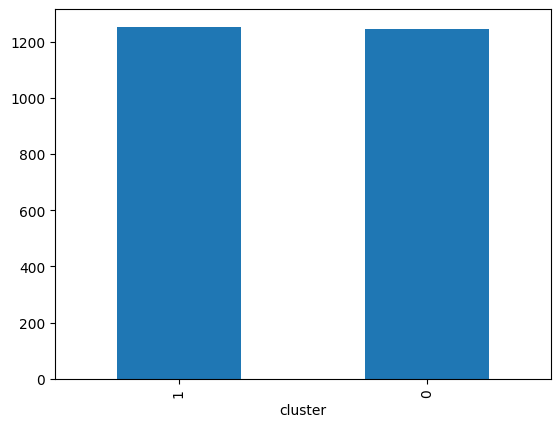

In [ ]:
df['cluster'].value_counts().plot.bar()

<Axes: xlabel='cluster', ylabel='Volume'>

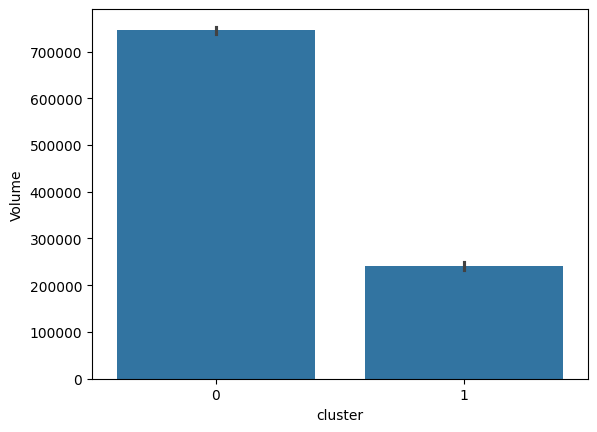

In [ ]:
sns.barplot(x=df['cluster'],y=df['Volume'])

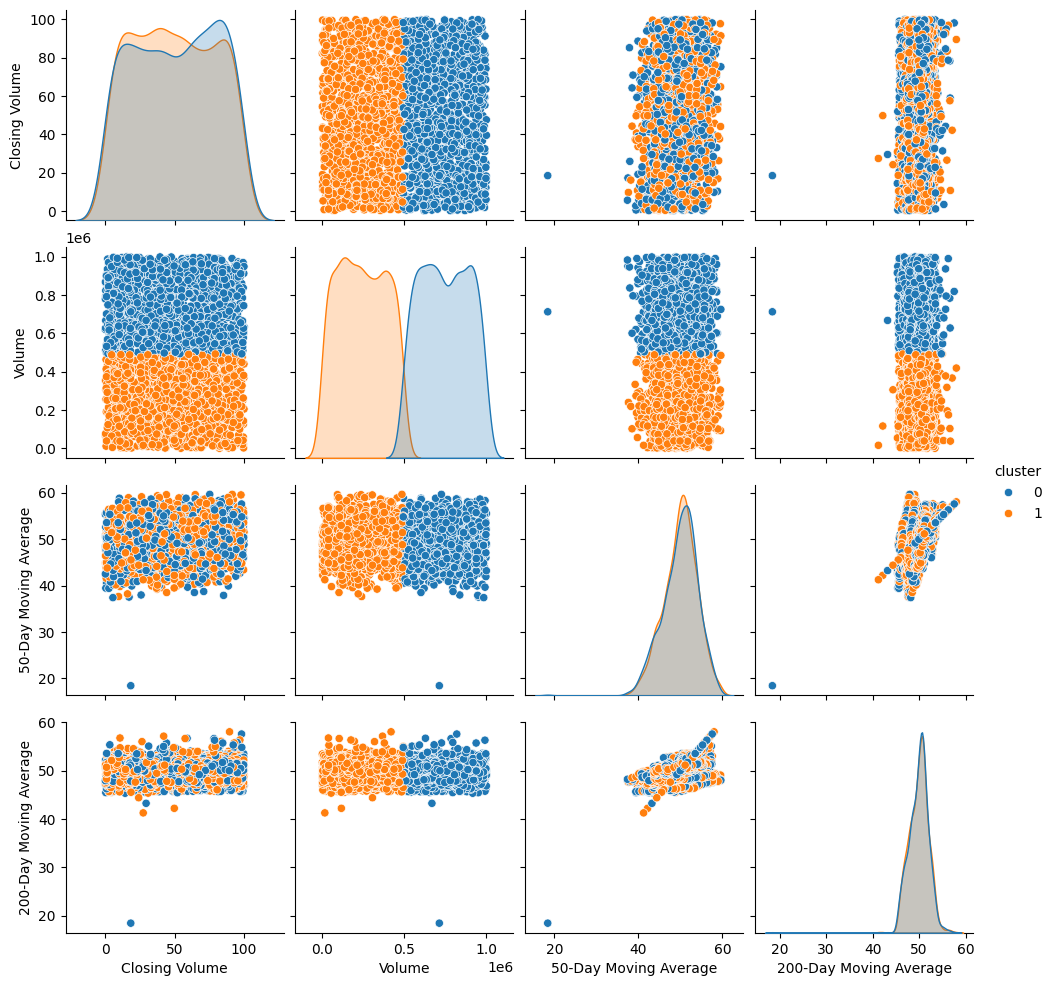

In [ ]:
sns.pairplot(df, hue='cluster')

<Axes: >

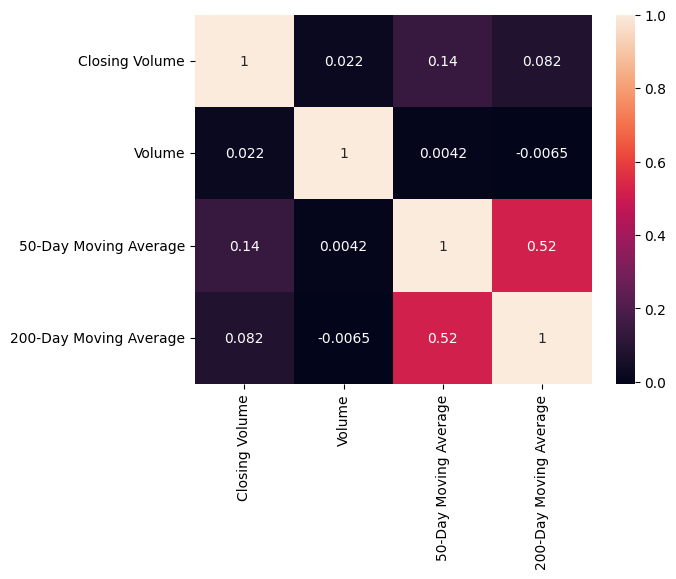

In [ ]:
sns.heatmap(cluster_df.corr(), annot=True)

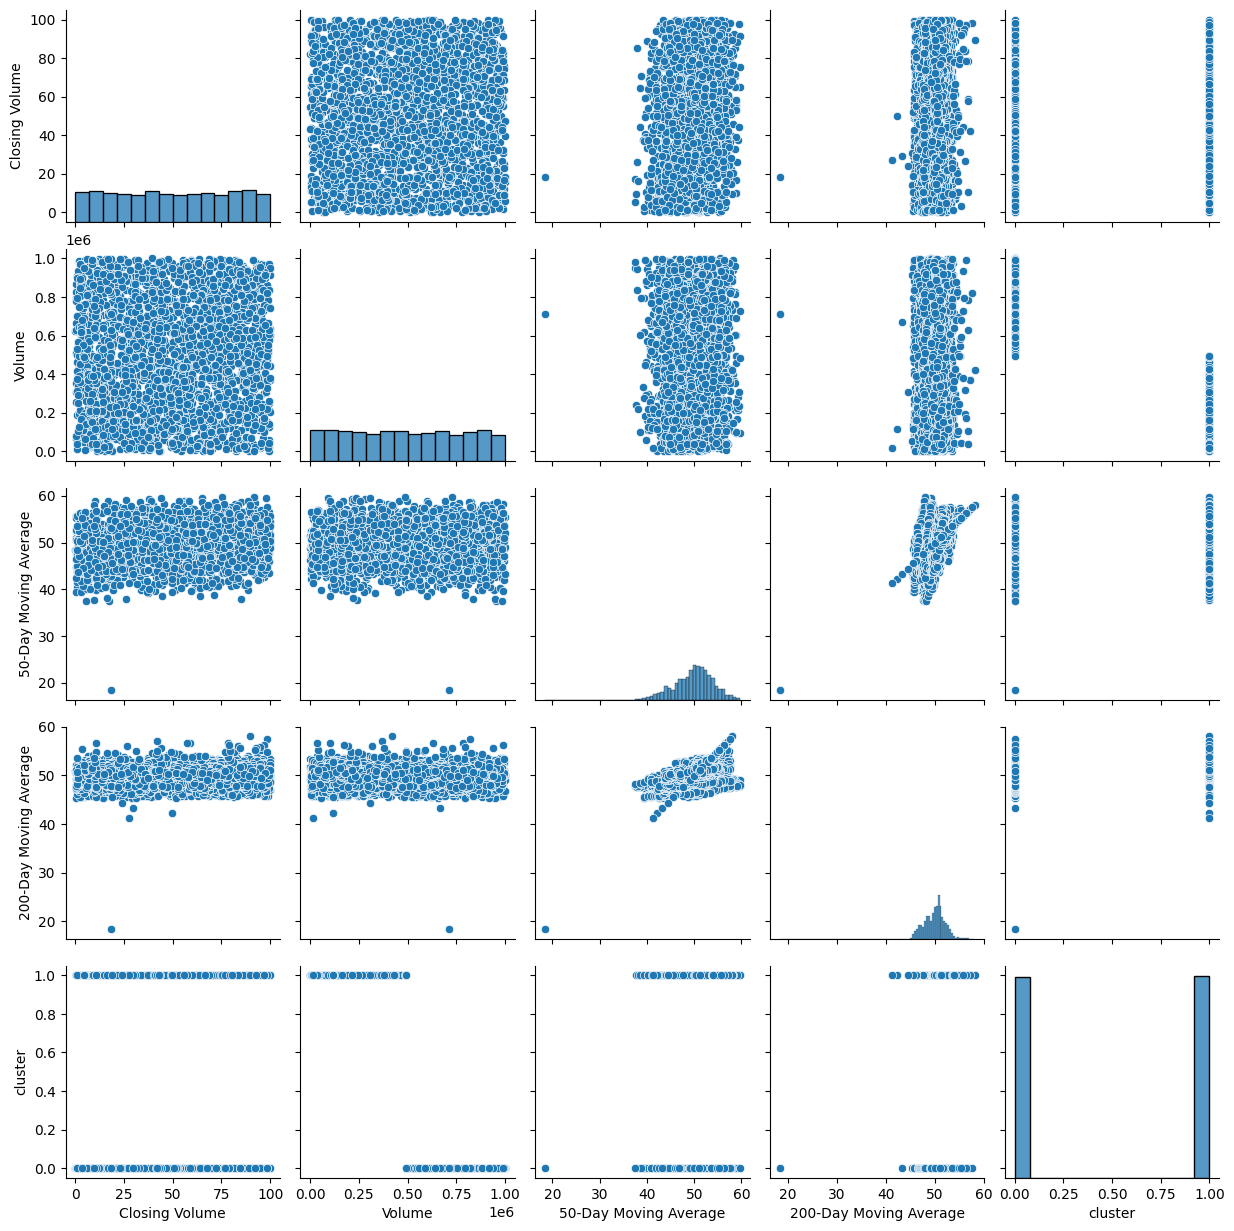

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Volume', ylabel='50-Day Moving Average'>

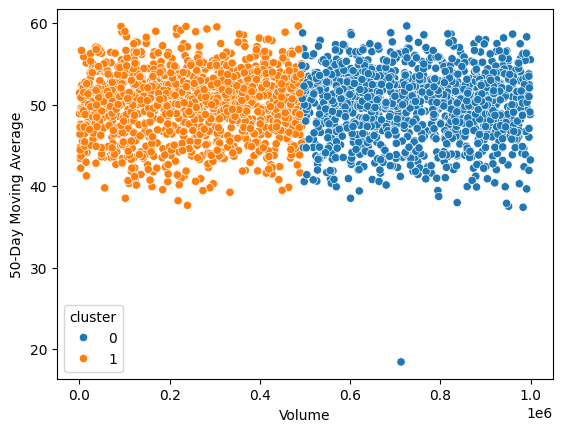

In [ ]:
sns.scatterplot(x=df['Volume'],
            y=df['50-Day Moving Average'],
            hue=df['cluster'],
            palette='tab10')